<a href="https://colab.research.google.com/github/erbasbihter/P218_TA-Sessions/blob/main/P218_TA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Configuration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
from IPython.display import Markdown, Math, display

# Slutsky Simulation

- Let $X_n \sim \mathcal{N}(0,1)$ and let the sequence $\{A_n\}$ be constants with $A_n \to 2$ as $n$ grows.
- For each $n$ $\in$ $\{10, 30, 300, 500\}$, draw n samples from $X_n$, compute the corresponding constant $A_n$, and form
  $ aX \;=\; A_n \cdot X_n$
  (So for each $n$, we're just scaling a standard normal by the nearly-constant $A_n$)

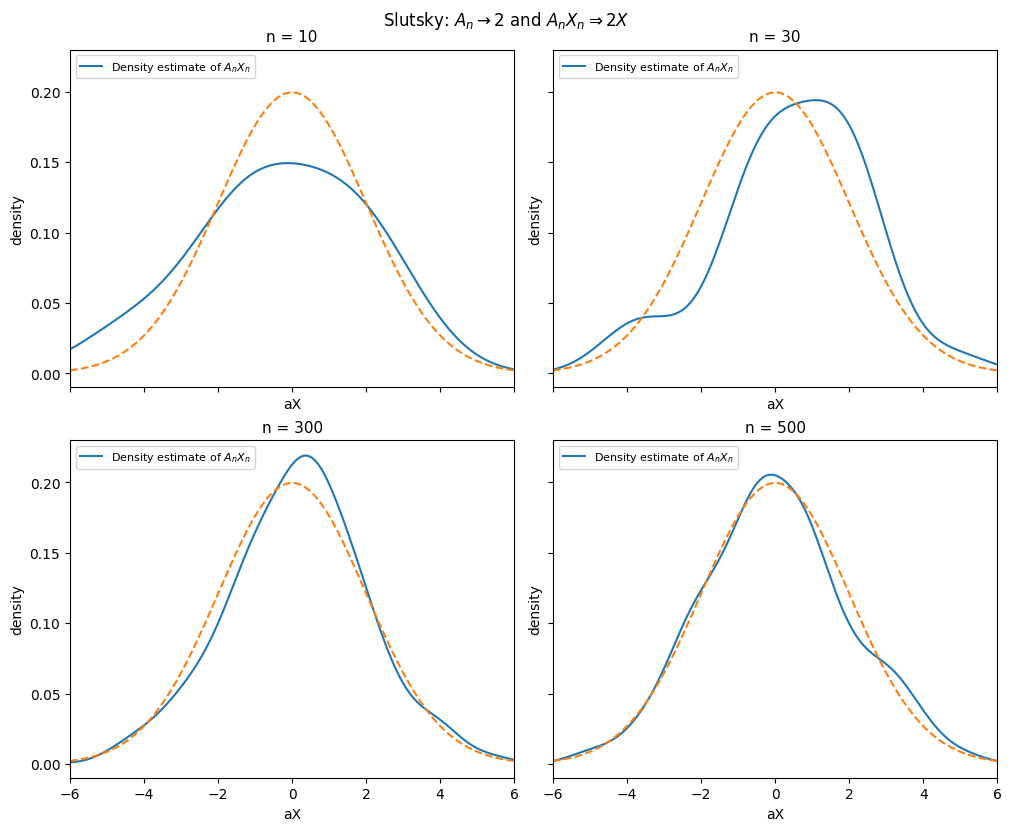

In [9]:
# Slutsky: aX where X is N(0,1) and a is converging to 2

# Setup
np.random.seed(1234)
N_list = [10, 30, 300, 500]

# Simulate Data
rows = []
for n in N_list:
    X_n = np.random.normal(size=n)
    A_n = 2 + np.exp(-n)    # scalar
    aX  = A_n * X_n         # vector
    rows.extend(
        {"n": n, "X_n": x, "A_n": A_n, "aX": ax}
        for x, ax in zip(X_n, aX)
    )

results = pd.DataFrame(rows)

# Plot densities of aX for each n with

xs = np.linspace(-6, 6, 400)

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True, constrained_layout=True)
axes = axes.ravel()

for ax, n in zip(axes, N_list):
    data = results.loc[results["n"] == n, "aX"].to_numpy()
    kde = gaussian_kde(data)
    ax.plot(xs, kde(xs), label=r"Density estimate of $A_nX_n$")
    ax.plot(xs, norm.pdf(xs, loc=0, scale=2), linestyle="--")
    a_n = results.loc[results["n"] == n, "A_n"].iloc[0]
    ax.set_title(f"n = {n}", fontsize=11)
    ax.set_xlim(-6, 6)
    ax.set_xlabel("aX")
    ax.set_ylabel("density")
    ax.legend(fontsize=8, loc="upper left")

fig.suptitle("Slutsky: $A_n\\to 2$ and $A_nX_n \\Rightarrow 2X$", fontsize=12, y=1.02)
plt.show()





- As $n$ increases, $A_n$ gets closer to 2, so $aX$ $\Rightarrow$ $2X$ with $X \sim \mathcal{N}(0,1)$.
- Consequently, the density of $aX$ remains centered at 0 and becomes indistinguishable from a normal with variance approaching
  
  $\mathrm{Var}(aX) \;=\; A_n^2 \cdot \mathrm{Var}(X_n) \;\to\; 2^2 = 4$
- Empirically, about 95% of the mass lies within roughly $\pm 2\sqrt{\mathrm{Var}(aX)} \approx \pm 4$, matching the visual bounds in the plot.


## Constant shift

Adding a constant $a$ to a standard distribution simply **translates** it; the spread is unchanged because a constant has zero variance. If $A_n$ satisfies $A_n \xrightarrow{p} a$, then the induced shift converges to $a$:

$Y_n \;=\; X + A_n, \qquad X \sim \mathcal{N}(0,1)$

$\mathbb{E}[Y_n] = A_n, \qquad \mathrm{Var}(Y_n) = \mathrm{Var}(X) = 1,
\qquad Y_n \Rightarrow X + a $


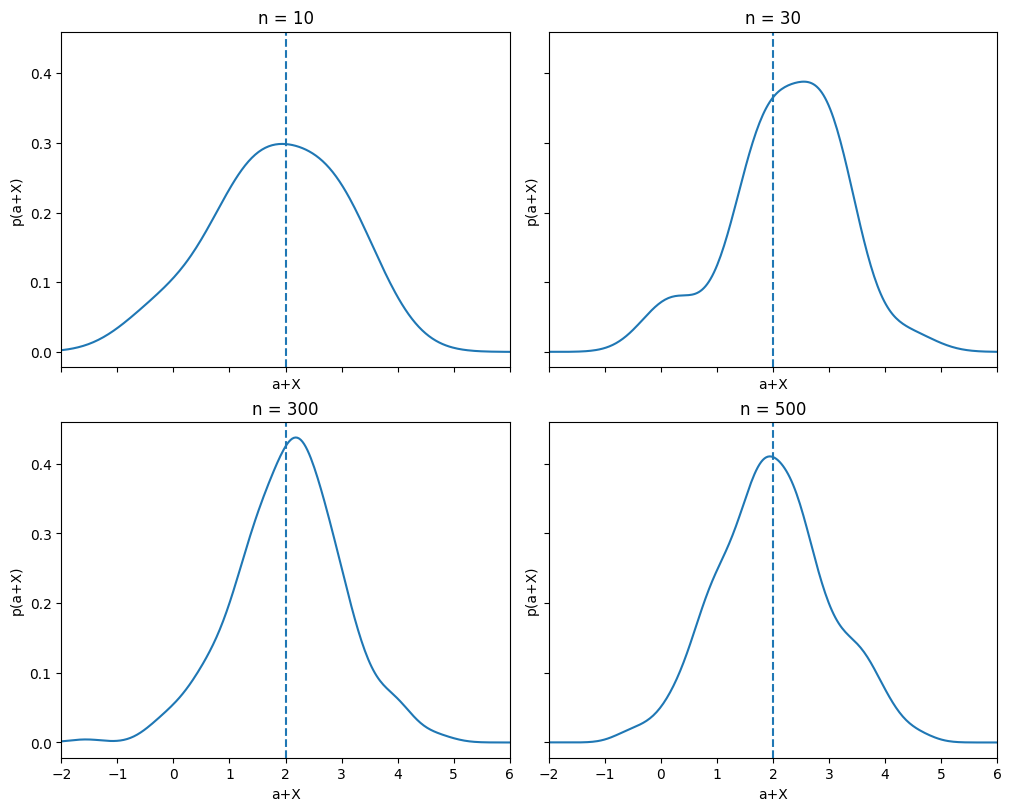

In [11]:
# Slutsky: a + X

# --- setup ---
np.random.seed(1234)
N_list = [10, 30, 300, 500]

# --- simulate data ---
rows = []
for n in N_list:
    X_n = np.random.normal(size=n)
    A_n = 2 + np.exp(-n)      # scalar
    a_plus_X = A_n + X_n      # vector
    rows.extend(
        {"n": n, "X_n": x, "A_n": A_n, "a_plus_X": apx}
        for x, apx in zip(X_n, a_plus_X)
    )

results = pd.DataFrame(rows)

# --- plot faceted densities with common support and x-limits ---
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True, constrained_layout=True)
axes = axes.ravel()

xs = np.linspace(-6, 6, 400)  # common evaluation grid

for ax, n in zip(axes, N_list):
    data = results.loc[results["n"] == n, "a_plus_X"].to_numpy()
    kde = gaussian_kde(data)
    ax.plot(xs, kde(xs))
    ax.axvline(2, linestyle='--')  # dashed vertical at x=2
    ax.set_title(f"n = {n}")
    ax.set_xlabel("a+X")
    ax.set_ylabel("p(a+X)")
    ax.set_xlim(-2, 6)             # fix x-axis bounds

plt.show()


As $n$ grows, the resulting distribution is well-approximated by a normal with variance 1 and mean $0 + a = 2$:

$Z_n \approx \mathcal{N}(2,\,1)$



Thus, as $n \to \infty$, we can deduce the limiting distribution of the combined object directly from the limiting pieces.


# Visualizing LLN


LLN tells us that:

$\bar{X}_n \;=\; \frac{1}{n}\sum_{i=1}^n X_i \;\xrightarrow{p}\; \mathbb{E}[X]$


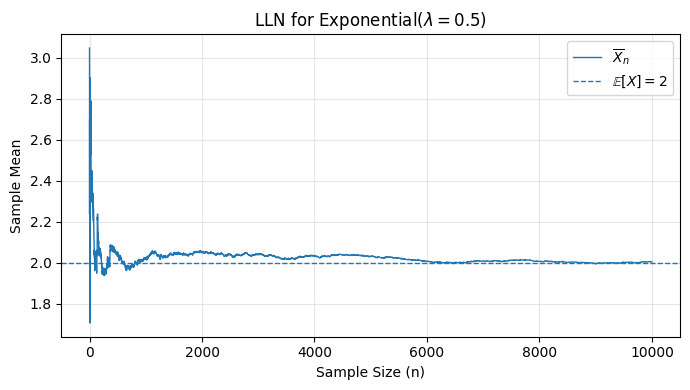

Final sample mean (n=10000): 2.0052  |  True mean: 2.0000


In [ ]:
# Settings
rng = np.random.default_rng(1234)
n_obs = 10000
rate = 0.5
scale = 1.0 / rate   # 2.0
true_mean = scale

# Sample & cumulative mean function
exp_sample = rng.exponential(scale=scale, size=n_obs)

def cum_mean(x: np.ndarray) -> np.ndarray:
    """Return the sequence of cumulative means."""
    csum = np.cumsum(x, dtype=float)
    n = np.arange(1, x.size + 1)
    return csum / n

mean_by_size = cum_mean(exp_sample)

# Plot cumulative means
plt.figure(figsize=(7, 4))
plt.plot(mean_by_size, linewidth=1, label=r'$\overline{X}_n$')
plt.axhline(true_mean, linestyle='--', linewidth=1, label=r'$\mathbb{E}[X]=2$')
plt.xlabel("Sample Size (n)")
plt.ylabel("Sample Mean")
plt.title("LLN for Exponential($\\lambda=0.5$)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Final sample mean (n={n_obs}): {mean_by_size[-1]:.4f}  |  True mean: {true_mean:.4f}")


# Visualizing the CLT (Exponential with rate  $\lambda=0.5$)

The CLT says

$\sqrt{n}\,(\bar X_n-\mu)\ \;\xrightarrow{d}\; \mathcal N(0,\sigma^2)$

so for $X\sim\text{Exp}(\lambda=0.5)$ with $\mu=2$ and $\sigma^2=4$, the scaled mean
$\sqrt{n}(\bar X_n-2)$ should look like $\mathcal N(0,4)$


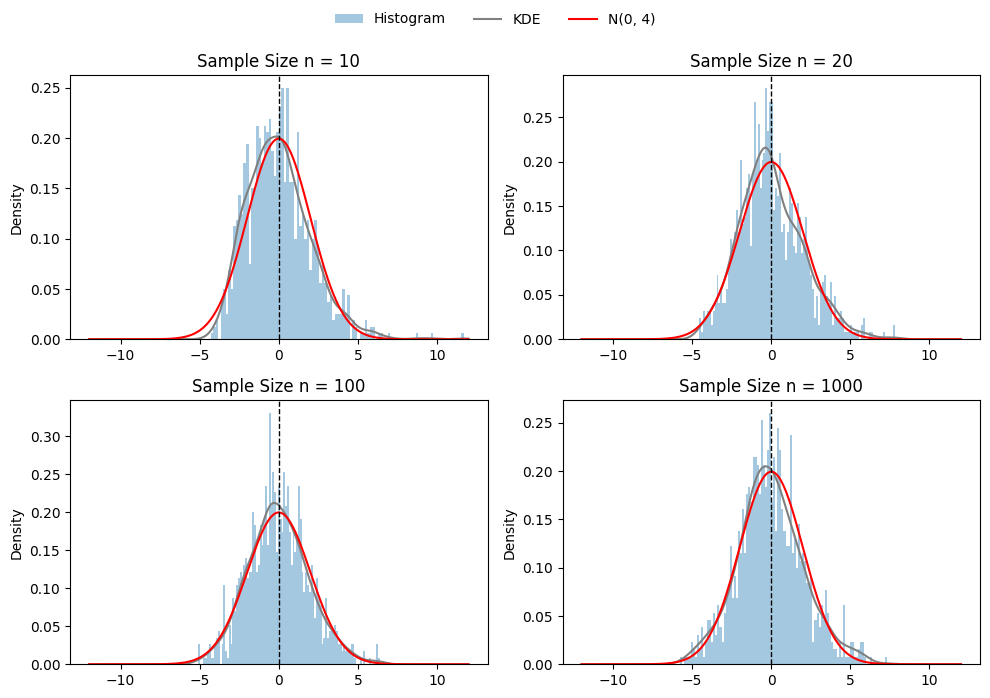

n=  10 | mean≈+0.017 | var≈4.044 (limit var = 4.0)
n=  20 | mean≈+0.014 | var≈4.083 (limit var = 4.0)
n= 100 | mean≈-0.008 | var≈3.683 (limit var = 4.0)
n=1000 | mean≈-0.021 | var≈4.310 (limit var = 4.0)


In [ ]:
# CLT simulation & plots for Exp(rate = 0.5)  --> mean=2, var=4
# Settings

rng = np.random.default_rng(1234)

num_samples = 1000                 # how many Monte Carlo draws of the mean
sample_sizes = [10, 20, 100, 1000] # n values
rate = 0.5
scale = 1.0 / rate                 # numpy uses 'scale' = 1/lambda
mu = scale                         # 2.0
sigma = 1.0 / rate                 # standard deviation = 2.0
var_lim = sigma**2                 # 4.0

# Collect standardized means for each n
stand_means = {}

for n in sample_sizes:
    # Draw num_samples * n observations
    draw = rng.exponential(scale=scale, size=num_samples * n).reshape(num_samples, n)
    xbar = draw.mean(axis=1)                      # sample means
    z = np.sqrt(n) * (xbar - mu)                  # CLT scaling (no division by sigma)
    stand_means[n] = z

# Plot
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes = axes.ravel()

x_grid = np.linspace(-12, 12, 1200)
limit_pdf = norm(loc=0, scale=sigma).pdf(x_grid) # N(0, 4) -> sd = 2

for ax, n in zip(axes, sample_sizes):
    z = stand_means[n]
    # Histogram
    ax.hist(z, bins=100, density=True, alpha=0.4, label="Histogram")
    # KDE
    kde = gaussian_kde(z)
    ax.plot(x_grid, kde(x_grid), color="gray", label="KDE")
    # Limiting N(0,4)
    ax.plot(x_grid, limit_pdf, color="red", label="N(0, 4)")
    # Mean line
    ax.axvline(z.mean(), linestyle="--", color="black", linewidth=1)
    ax.set_title(f"Sample Size n = {n}")
    ax.set_xlabel("")
    ax.set_ylabel("Density")

#
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Verification
for n in sample_sizes:
    z = stand_means[n]
    print(f"n={n:>4} | mean≈{z.mean():+.3f} | var≈{z.var(ddof=0):.3f} (limit var = {var_lim})")
